<a href="https://colab.research.google.com/github/uptrain-ai/uptrain/blob/main/examples/assistants/assistant_evaluator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">
  <a href="https://uptrain.ai">
    <img width="300" src="https://user-images.githubusercontent.com/108270398/214240695-4f958b76-c993-4ddd-8de6-8668f4d0da84.png" alt="uptrain">
  </a>
</h1>

<h1 style="text-align: center;">Evaluation of AI Assistants</h1>

### What is an AI Assistant?

[OpenAI Assistants API](https://platform.openai.com/docs/assistants/overview?context=with-streaming) allows you to build AI assistants within your own applications. It leverages tools like Code Interpreter, Retrieval, and Function calling to answer user queries.

### The Problem

Building an AI Assistant may seem straightforward, but evaluating its performance requires careful consideration of several criteria.

Initially, you must engage with the assistant in various scenarios or personas.

Then, you need to assess the AI's performance based on criteria such as user frustration, response completeness, factual accuracy, and more.

### The Solution

UpTrain enables you to simulate conversations with AI assistants using predefined scenarios.

You can create personas such as "angry customer," "talkative customer," or "confused customer," and UpTrain will simulate conversations between these personas and the AI assistant.

Using these conversations UpTrain then evaluates the AI assistant's performance in various realistic scenarios, providing valuable insights for improvement.

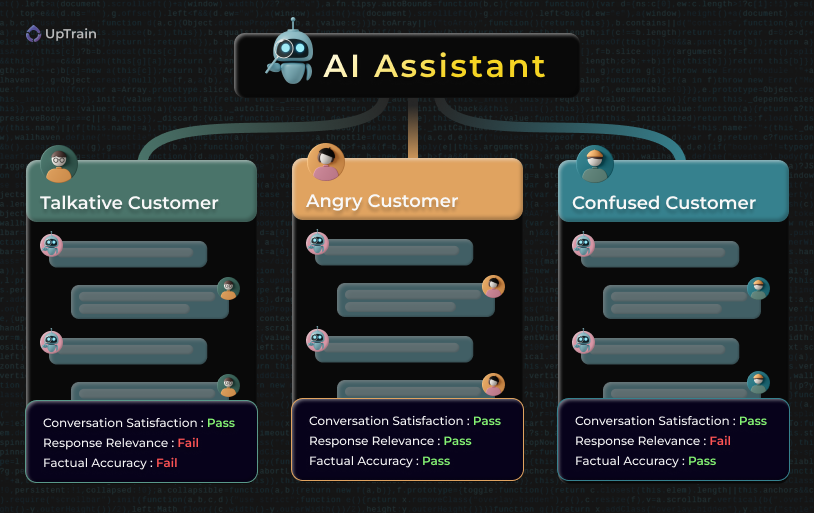

## Step 1: Import Required Libraries

In [1]:
# %pip install -U uptrain 

In [2]:
from uptrain import EvalAssistant
import os

/Users/shreyanshjain/Documents/UpTrain/GitHub_Clone/uptrain/.venv/lib/python3.11/site-packages/lazy_loader/__init__.py:185: RuntimeWarning: subpackages can technically be lazily loaded, but it causes the package to be eagerly loaded even if it is already lazily loaded.So, you probably shouldn't use subpackages with this lazy feature.
  warnings.warn(msg, RuntimeWarning)
/Users/shreyanshjain/Documents/UpTrain/GitHub_Clone/uptrain/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Step 2: Define your AI Assistant

Let's set the inputs for your AI assistant:
- `user_bot_name`: Your bot name

- `user_bot_instructions`: The original set of prompts you want to use to test your assistant

- `user_bot_file_list`: The path to the files which act as your knowledge base

- `user_bot_model`(optional): The LLM model you want to use (we will use `gpt-4-1106-preview` by default)

In [3]:
user_bot_name = 'Nurse Bot v1'

user_bot_instructions = """
You are an expert, professional nurse who is knowledgeable in various medical scenarios. 
Patients will come to you with questions about their health, seeking guidance and reassurance. 
Your responses should provide accurate information and addressing their concerns in a clear and empathetic manner. 
Your role is crucial in helping patients understand their health conditions and make informed decisions about their care.
"""

user_bot_file_list = ['context_docs/medicine_list.docx','context_docs/disease_list.pdf']

## Step 3: Define your Evaluation Personas

Let's set the arguments for the evaluator:

- `user_bot_purpose`: A small description of the purpose of your bot

- `evaluator_persona`: List of different persona (or scenarios) you wish to test your bot on. 

- `evaluator_bot_model`(optional): The LLM model you want to use (we will use `gpt-4-1106-preview` by default)

In [4]:
user_bot_purpose = 'Answer patient queries on different medical scenarios to patients'

evaluator_persona = [
    "Patient inquiring about the causes of hypertension.",
    "Patient wanting to know about the preventive measures for malaria.",
    "Patient asking about the duration of treatment for a sinus infection",
    "Patient asking about the safety of taking paracetamol during pregnancy.",
    "Patient inquiring about the appropriate dosage of ibuprofen for a headache."
]

## Step 4: Generate Conversations

Let's simulate the conversations based on these personas

By default, we will generate 4 pairs of conversation for each scenario. If you wish to change that, let's say to 10 conversation pairs, you can simply do so by adding an argument: `trial_count = 10`

In [5]:
assistant_eval_client = EvalAssistant(openai_api_key="sk-**************")

message =  assistant_eval_client.simulate_conversation(
    user_bot_name = user_bot_name,
    user_bot_instructions = user_bot_instructions,
    user_bot_purpose = user_bot_purpose,
    user_bot_file_list = user_bot_file_list,
    evaluator_persona_list = evaluator_persona,
)

2024-04-04 13:50:51.997 | INFO     | uptrain.framework.eval_assistant.assistant_evals_utils:simulate_conversation:202 - Step 1 of 5 Completed
2024-04-04 13:52:42.594 | INFO     | uptrain.framework.eval_assistant.assistant_evals_utils:simulate_conversation:202 - Step 2 of 5 Completed
2024-04-04 13:54:25.587 | INFO     | uptrain.framework.eval_assistant.assistant_evals_utils:simulate_conversation:202 - Step 3 of 5 Completed
2024-04-04 13:55:53.231 | INFO     | uptrain.framework.eval_assistant.assistant_evals_utils:simulate_conversation:202 - Step 4 of 5 Completed
2024-04-04 13:57:06.551 | INFO     | uptrain.framework.eval_assistant.assistant_evals_utils:simulate_conversation:202 - Step 5 of 5 Completed
100%|██████████| 1/1 [00:01<00:00,  1.31s/it]
2024-04-04 13:57:34.010 | SUCCESS  | uptrain.framework.eval_assistant.assistant_evals_utils:simulate_conversation:210 - Simulation Completed successfully


You can see the generated conversations for the defined evaluator personas

In [6]:
message[0]

{'evaluator_persona': 'Patient inquiring about the causes of hypertension.',
 'conversation': [{'role': 'user',
   'content': "Hello, I've been recently diagnosed with hypertension, and I'm trying to understand more about its causes. Could you provide me with some information on what typically leads to hypertension?",
   'retrieved_context': '6. Lisinopril: Lisinopril is an angiotensin-converting enzyme (ACE) inhibitor used to treat high blood pressure, heart failure, and to improve survival after a heart attack. It works by relaxing blood vessels, which helps to lower blood pressure. Lisinopril should be taken as prescribed, usually once a day, and it should not be used with potassium supplements or salt substitutes containing potassium without consulting a healthcare provider. 13. Metoprolol: Metoprolol is a beta-blocker used to treat high blood pressure, angina (chest pain), and heart failure. It works by blocking the action of certain natural chemicals in the body, such as adrenali

## Step 5: Evaluate Conversations

Now let's evaluate these simulated conversations

We have used the following 5 metrics from UpTrain's library:

1. [Conversation Satisfaction](https://docs.uptrain.ai/predefined-evaluations/conversation-evals/user-satisfaction): Evaluates how well the user's concerns are addressed and grades their satisfaction based on provided conversation.

2. [Factual Accuracy](https://docs.uptrain.ai/predefined-evaluations/context-awareness/factual-accuracy): Evaluates whether the response generated is factually correct and grounded by the provided context.

3. [Response Relevance](https://docs.uptrain.ai/predefined-evaluations/response-quality/response-relevance): Evaluates how relevant the generated response was to the question specified.

4. [Context Relevance](https://docs.uptrain.ai/predefined-evaluations/context-awareness/context-relevance): Evaluates how relevant the retrieved context is to the question specified.

5. [Response Conciseness](https://docs.uptrain.ai/predefined-evaluations/response-quality/response-conciseness): Evaluates how concise the generated response is or if it has any additional irrelevant information for the question asked.

Each score has a value between 0 and 1. 

You can look at the complete list of UpTrain's supported metrics [here](https://docs.uptrain.ai/predefined-evaluations/overview)

In [7]:
from uptrain import ConversationSatisfaction, Evals

results = assistant_eval_client.evaluate(
    data = message,
    checks = [
                ConversationSatisfaction(llm_persona = user_bot_purpose), 
                Evals.FACTUAL_ACCURACY, 
                Evals.RESPONSE_RELEVANCE, 
                Evals.CONTEXT_RELEVANCE, 
                Evals.RESPONSE_CONCISENESS
            ]
    )

100%|██████████| 4/4 [00:01<00:00,  2.99it/s]
2024-04-04 13:57:48.933 | INFO     | uptrain.framework.evalllm:evaluate:365 - Local server not running, start the server to log data and visualize in the dashboard!
100%|██████████| 4/4 [00:02<00:00,  1.96it/s]
2024-04-04 13:58:08.053 | INFO     | uptrain.framework.evalllm:evaluate:365 - Local server not running, start the server to log data and visualize in the dashboard!
100%|██████████| 4/4 [00:01<00:00,  3.02it/s]
2024-04-04 13:58:24.315 | INFO     | uptrain.framework.evalllm:evaluate:365 - Local server not running, start the server to log data and visualize in the dashboard!
100%|██████████| 4/4 [00:01<00:00,  2.80it/s]
2024-04-04 13:58:46.164 | INFO     | uptrain.framework.evalllm:evaluate:365 - Local server not running, start the server to log data and visualize in the dashboard!
100%|██████████| 4/4 [00:01<00:00,  2.85it/s]
2024-04-04 13:59:06.093 | INFO     | uptrain.framework.evalllm:evaluate:365 - Local server not running, start 

**Let's look at the results generated**

Case: Patient inquiring about the causes of hypertension.

We can see the complete information including individual conversation pairs and the conversation satisfaction score

In [8]:
results[0]

{'evaluator_persona': 'Patient inquiring about the causes of hypertension.',
 'conversation': [[{'role': 'user',
    'content': "Hello, I've been recently diagnosed with hypertension, and I'm trying to understand more about its causes. Could you provide me with some information on what typically leads to hypertension?",
    'retrieved_context': '6. Lisinopril: Lisinopril is an angiotensin-converting enzyme (ACE) inhibitor used to treat high blood pressure, heart failure, and to improve survival after a heart attack. It works by relaxing blood vessels, which helps to lower blood pressure. Lisinopril should be taken as prescribed, usually once a day, and it should not be used with potassium supplements or salt substitutes containing potassium without consulting a healthcare provider. 13. Metoprolol: Metoprolol is a beta-blocker used to treat high blood pressure, angina (chest pain), and heart failure. It works by blocking the action of certain natural chemicals in the body, such as adren

Further, we can also look at individual conversation pairs and get different scores for those pairs

In [12]:
results[0]['conversation'][0]

[{'role': 'user',
  'content': "Hello, I've been recently diagnosed with hypertension, and I'm trying to understand more about its causes. Could you provide me with some information on what typically leads to hypertension?",
  'retrieved_context': '6. Lisinopril: Lisinopril is an angiotensin-converting enzyme (ACE) inhibitor used to treat high blood pressure, heart failure, and to improve survival after a heart attack. It works by relaxing blood vessels, which helps to lower blood pressure. Lisinopril should be taken as prescribed, usually once a day, and it should not be used with potassium supplements or salt substitutes containing potassium without consulting a healthcare provider. 13. Metoprolol: Metoprolol is a beta-blocker used to treat high blood pressure, angina (chest pain), and heart failure. It works by blocking the action of certain natural chemicals in the body, such as adrenaline, that affect the heart and blood vessels. Metoprolol should be taken as prescribed, and it sh

In [14]:
results[0]['conversation'][1]

[{'role': 'user',
  'content': 'Thank you for the detailed explanation. It really helps to understand the potential causes of hypertension. Given these factors, could you also advise on specific dietary changes or foods that I should focus on to help manage my hypertension?',
  'retrieved_context': '6. Lisinopril: Lisinopril is an angiotensin-converting enzyme (ACE) inhibitor used to treat high blood pressure, heart failure, and to improve survival after a heart attack. It works by relaxing blood vessels, which helps to lower blood pressure. Lisinopril should be taken as prescribed, usually once a day, and it should not be used with potassium supplements or salt substitutes containing potassium without consulting a healthcare provider. avoiding NSAIDs, quitting smoking, and reducing stress. Treatment includes antibiotics toeradicate H. pylori, medications to reduce stomach acid production, and lifestyle modifications. diet, regular exercise, and avoiding constipation. Treatment include

Case: Patient asking about the safety of taking paracetamol during pregnancy.

In [11]:
results[3]

{'evaluator_persona': 'Patient asking about the safety of taking paracetamol during pregnancy.',
 'conversation': [[{'role': 'user',
    'content': "Hi, I'm currently pregnant and I've been experiencing some headaches. I was wondering if it's safe for me to take paracetamol?",
    'retrieved_context': "1. Paracetamol (Acetaminophen): This medication is commonly used to relieve mild to moderate pain and reduce fever. It is available over-the-counter and is often used to alleviate symptoms of headaches, muscle aches, and fever. It is important to follow the recommended dosage and frequency to avoid overdose, and to avoid taking it with other medications containing acetaminophen. 2. Ibuprofen: Ibuprofen is a nonsteroidal anti-inflammatory drug (NSAID) commonly used to relieve pain, reduce inflammation, and lower fever. It is often used to treat conditions such as headaches, toothaches, muscle aches, arthritis, and menstrual cramps. Ibuprofen should be taken with food or milk to reduce the

In [13]:
results[3]['conversation'][0]

[{'role': 'user',
  'content': "Hi, I'm currently pregnant and I've been experiencing some headaches. I was wondering if it's safe for me to take paracetamol?",
  'retrieved_context': "1. Paracetamol (Acetaminophen): This medication is commonly used to relieve mild to moderate pain and reduce fever. It is available over-the-counter and is often used to alleviate symptoms of headaches, muscle aches, and fever. It is important to follow the recommended dosage and frequency to avoid overdose, and to avoid taking it with other medications containing acetaminophen. 2. Ibuprofen: Ibuprofen is a nonsteroidal anti-inflammatory drug (NSAID) commonly used to relieve pain, reduce inflammation, and lower fever. It is often used to treat conditions such as headaches, toothaches, muscle aches, arthritis, and menstrual cramps. Ibuprofen should be taken with food or milk to reduce the risk of stomach irritation, and alcohol should be avoided while taking this medication. 31. Headaches: Headaches are a